In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Numerical error

## Types of error

1. Truncation error: caused by approximating a mathematical process.
(based on ideas from WIkipedia on https://en.wikipedia.org/wiki/Truncation_error)

In [ ]:
# mathematical example of truncation error


2. rounding error: 

In [1]:
# machine epsilon

# calculate 7./3-4./3-1

result= 7./3-4./3-1

print(result)

2.220446049250313e-16


# 2. Numerical Integration

In [13]:
#define left reiman sum

def lsum(f,h): #f is an array evaluated at first N points
    return sum(f*h)

In [4]:
logspace(1, 6, num=6, endpoint=True, base=10.0, dtype=None, axis=0)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [27]:
#integrate sin(x) over 0 <=x <= pi/2 using different # of slices
Nslices = array(logspace(1, 6, num=6, base=10.0, dtype=None, axis=0),int)
#Nslices = [10**1,10**2,10**3,10**4,10**5,10**6]
hs=[]
errs=[]

for N in Nslices:
    h=0.5*pi/N
    hs.append(h)
    xs = linspace (0,0.5*pi,N+1)
    fs = sin(xs[:N])
    rslt =lsum(fs,h)
    
    error = abs(1.0-rslt)
    errs.append(error)

Text(0, 0.5, 'absolute error')

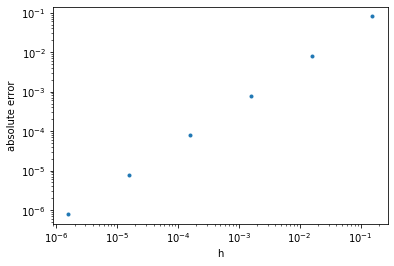

In [28]:
plot(hs,errs,'.')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

In [25]:
polyfit(log(hs),log(errs),1)

array([ 1.00170415, -0.67538975])

fit slope is about 1.o so error goes as h^1.
to get an error of 1e-8, that gives h approximately 

## Trapezoid Rule

In [7]:
import scipy.integrate as integrate

In [42]:
#integrate sin(x) over 0 <=x <= pi/2 using different # of slices
Nslices = array(logspace(1, 6, num=6, base=10.0, dtype=None, axis=0),int)
#Nslices = [10**1,10**2,10**3,10**4,10**5,10**6]
hs=[]
errs=[]

for N in Nslices:
    h=0.5*pi/N
    hs.append(h)
    xs = linspace (0,0.5*pi,N)
    fs = sin(xs[:N])
    rslt =integrate.trapz(fs,xs)
    
    error = abs(1.0-rslt)
    errs.append(error)

Text(0, 0.5, 'absolute error')

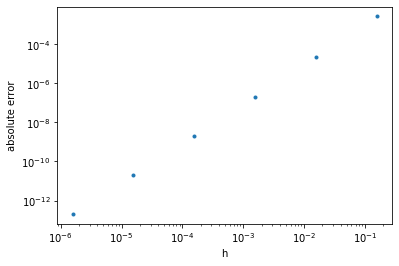

In [43]:
plot(hs,errs,'.')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

In [44]:
polyfit(log(hs),log(errs),1)

array([ 2.01384261, -2.34058634])

fit slope is about 2.o so error goes as h^2.
to get an error of 1e-8, that gives h approximately 

## Simpson's rule

In [54]:
#integrate sin(x) over 0 <=x <= pi/2 using different # of slices
Nslices = array(logspace(1, 9, num=9, base=2.0, dtype=None, axis=0),int)
#Nslices = [2**1,2**2,2**3,...,2**7,10**8,10**9]
hs=[]
errs=[]

for N in Nslices:
    h=0.5*pi/N
    hs.append(h)
    xs = linspace (0,0.5*pi,N)
    fs = sin(xs[:N])
    rslt =integrate.simps(fs,xs)
    
    error = abs(1.0-rslt)
    errs.append(error)

Text(0, 0.5, 'absolute error')

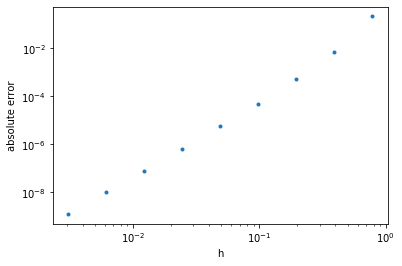

In [55]:
plot(hs,errs,'.')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

In [56]:
polyfit(log(hs),log(errs),1)

array([ 3.3247767 , -1.72067019])

fit slope is about 3.3.o so error goes as h^3.3.
to get an error of 1e-8, that gives h approximately 

## Other methods

In [57]:
xs=linspace(0,7.1,100)
cos=cos(0.5*pi*xs*xs)

Text(0, 0.5, 'cos($\\pi/2$)$x^2$')

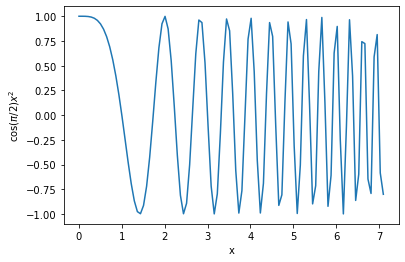

In [63]:
plot(xs,cos)
xlabel('x')
ylabel('cos($\pi/2$)$x^2$')

In [4]:
import scipy.special as spec

In [17]:
S,C= spec.fresnel(7.1)
print (S)

0.5360173545107794


In [43]:
Nslices = array(logspace(1, 12, num=12, base=2.0, dtype=None, axis=0),int)

S,C= spec.fresnel(7.1)
x0=0
xf=7.1
hs=[]
errs=[]

for N in Nslices:
    h=(xf-x0)/N
    hs.append(h)
    xs = linspace (0,7.1,N+1)
    fs = cos(0.5*pi* xs * xs)
    rslt =integrate.simps(fs,xs)
    
    error = abs(C-rslt)
    errs.append(error)

Text(0, 0.5, 'absolute error')

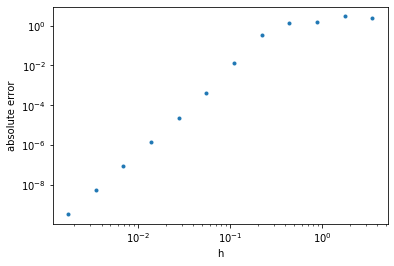

In [44]:
plot(hs,errs,'.')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

This shows that methods based on uniform points can be problematic. A method known as Gaussian quadrature  uses non-uniformly spaced points to evaluate the integral.

In [38]:
def f(x):
    return cos(0.5*pi*x*x) #define the functionfor fixed quad

result = integrate.fixed_quad(f,0,7.1,n=35)

print(result)

(0.47349928719096074, None)


In [41]:
Nslices = array(logspace(1, 7, num=7, base=2.0, dtype=None, axis=0),int)

x0=0
xf=7.1
S,C= spec.fresnel(xf)
hs=[]
errs=[]

for N in Nslices:
    h=(xf-x0)/N
    hs.append(h)
   
    rslt =integrate.fixed_quad(f,0,7.1,n=N)
    
    error = abs(C-rslt[0])
    errs.append(error)

Text(0, 0.5, 'absolute error')

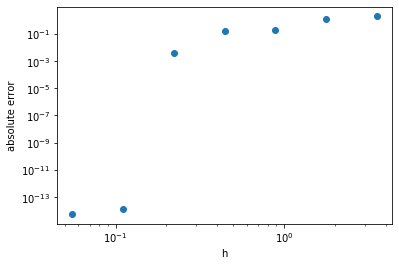

In [42]:
plot(hs,errs,'o')
xscale('log')
yscale('log')
xlabel('h')
ylabel('absolute error')

In [45]:
integrate.quadrature(f,x0,xf,tol=1e-8)

(0.4733111981263692, 9.812996526470386e-10)

In [46]:
def f(x):
    return exp(-0.5*x*x)
integrate.quad(f,-inf,inf,epsabs=1e-8)

(2.5066282746309994, 2.5512942192316024e-08)

## Monte Carlo integration

The advantage of Monte Carlo sampling is that it can reliably estimate the average with only a few samples. This is particularly useful for integrals in higher dimensions where it is typically the best approach. However, it has drawbacks. If the function is pathological, many samples may be required in order to get the desired tolerance. Another drawback is that it can be horribly inefficient. For example, if we have a function that (unknowingly) happens to be zero over a large part of the domain, we end up wasting time sampling from these regions. This leads to techniques that compensate for this known as importance sampling. 

In [55]:
Nslices = array(logspace(1, 7, num=7, base=10.0, dtype=None, axis=0),int)

def f(x):
    return cos(0.5*pi*x*x)

x0=0
xf=7.1
S,C=spec.fresnel(xf)
errs=[]
for N in Nslices:
    xs = x0+(xf-x0)*random.random(N) #n radom pt between x0 and xf
    fs = f(xs)
    rslt =(xf-x0)*mean(fs)
    
    error = abs(C-rslt)
    errs.append(error)

Text(0, 0.5, 'absolute error')

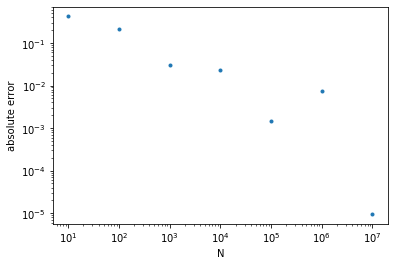

In [56]:
plot(Nslices,errs,'.')
xscale('log')
yscale('log')
xlabel('N')
ylabel('absolute error')

# Numerical differentiation

## ODE

## Euler method

In [82]:
h0= 1
v0=5
g=9.81
yi=[]
time=[]
for t in range(0,2,1):
    y=h0+v0*t+ 0.5*-g*t**2
    yi.append(y)
    time.append(t)

Text(0, 0.5, 'y(t)')

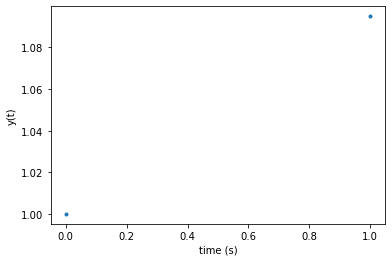

In [83]:
plot(time,yi,'.')
xlabel('time (s)')
ylabel('y(t)')

Text(0, 0.5, 'displacement(m)')

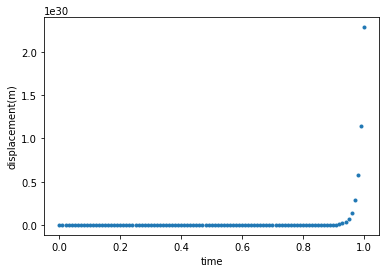

In [115]:
deltat=0.01
t0=0
tf=1
yi=1
yt=[]
time=[]
for t in range(0,101):
    ti=0
    ti+=t*deltat
    v=-9.8*deltat
    yi+=yi+1*v
    yt.append(yi)
    time.append(ti)

plot(time,yt,'.')
xlabel('time')
ylabel('displacement(m)')

## Better Methods

## Applications